<a href="https://colab.research.google.com/github/TienNam97/Shot-Boundary-Detection/blob/main/Histogram_based_BBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import scipy.signal as si
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd 'drive/My Drive'
%cd 'Colab Notebooks/BBC_Planet_Earth_Dataset'

/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks/BBC_Planet_Earth_Dataset


In [ ]:
def video2frame(video_src_path, formats, file_save_path):
    """
    detect the shot boundary of the first and last frame
    :param video_src_path:  video file to detect
    :param formats: video formats to detect
    :param file_save_path: frames saved location
    :return: frame and index
    """

    f = open(file_save_path, 'w')
    diff_threshold = 0.25
    window_size = 10

    if os.path.isfile(video_src_path):
        video = video_src_path.split('/')[-1]
    else:
        raise SystemExit('wrong path')

    if video[-4:] not in formats:
        raise SystemExit('wrong format')


    # open a video
    cap = cv2.VideoCapture(video_src_path)

    frame_num = cap.get(7)
    print('Numbers of frames: ', int(frame_num - 1))
    frame_diff = []
    frame_index = []

    if cap.isOpened():
        success = True
    else:
        success = False
        print("Fail in reading videos!")

    frame_count = 0

    # read a frame
    while success:
        read, frame = cap.read()
        #print(frame_count, read)

        if read:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            n_pixel = frame.shape[0] * frame.shape[1]
            hist = cv2.calcHist([gray], [0], None, [16], [0, 256])
            hist = hist * (1.0 / n_pixel)
            frame_diff.append(hist)
            frame_index.append(frame_count)

            frame_count += 1

        else:
            break


    # compute the distance between this frame with previous frame
    frame_count = len(frame_diff) - 1

    while frame_count >= 1:
        frame_diff[frame_count] = np.sum(np.abs(np.subtract(frame_diff[frame_count], frame_diff[frame_count - 1])))
        frame_count -= 1

    frame_diff[0] = 0

    vector = np.array(frame_diff)
    print(vector)
    indexes, _ = si.find_peaks(vector, height=diff_threshold, distance=window_size)

    print('Numbers of shots', len(indexes))

    # write down the shot boundary frames' index
    f.write("0"+"\t")
    for index in indexes:
        f.write(str(index-1)+"\n"+str(index)+"\t")

    f.write(str(int(frame_num - 1)))
    # close the video
    cap.release()

    # show the frames' histogram differences
    plt.figure(figsize=(15,15))
    plt.plot(frame_index, frame_diff)
    plt.xlabel("frame")
    plt.ylabel("histogram difference with previous one")
    plt.show()

In [ ]:
video_formats = [".MP4", ".mp4"]
#video_file = './RAIDataset/videos/10.mp4'
#videos_src_path = video_file
#files_save_path = './Histogram/result10.txt'

bbc_01
Numbers of frames:  73874
[0. 0. 0. ... 0. 0. 0.]
Numbers of shots 460


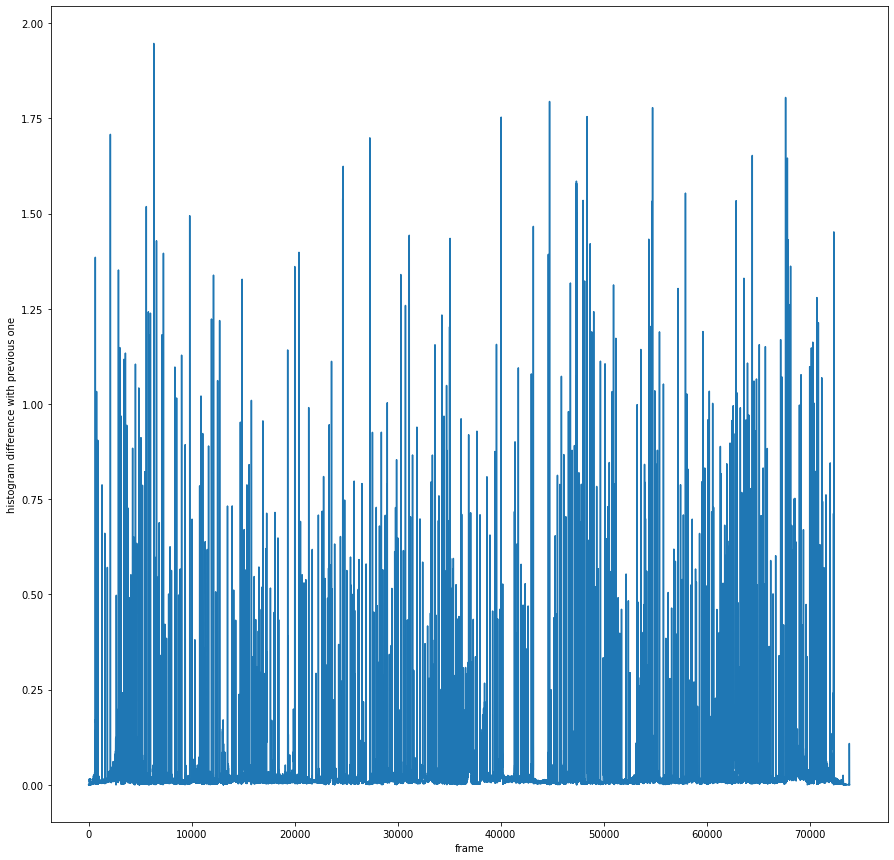

bbc_02
Numbers of frames:  72114
[0. 0. 0. ... 0. 0. 0.]
Numbers of shots 391


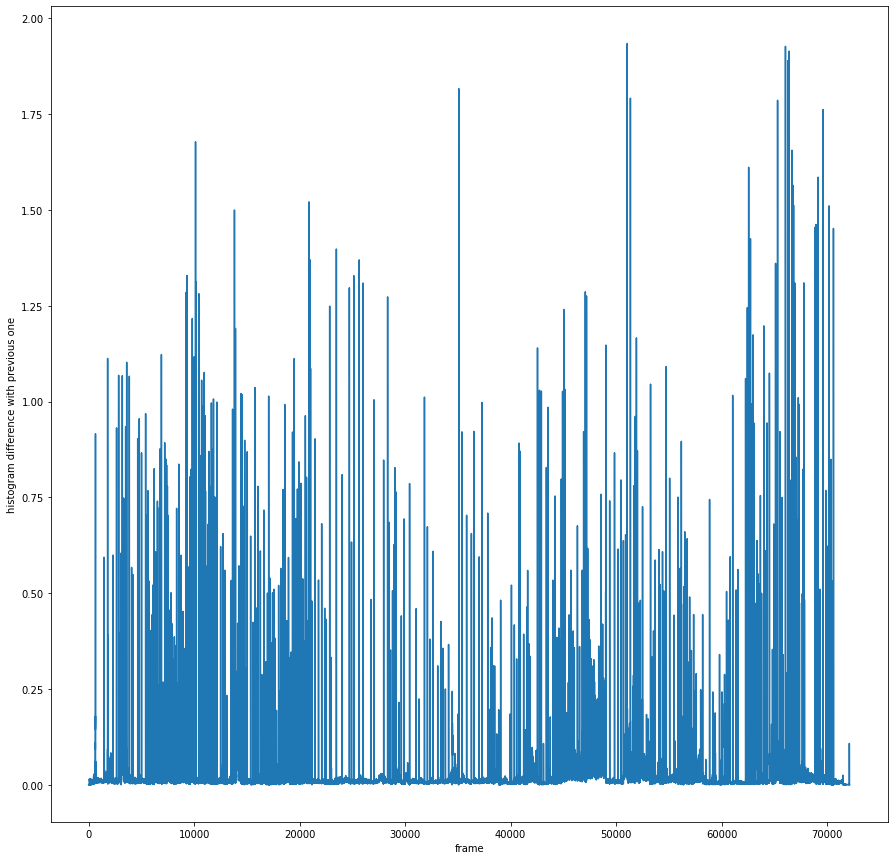

bbc_03
Numbers of frames:  73924
[0. 0. 0. ... 0. 0. 0.]
Numbers of shots 444


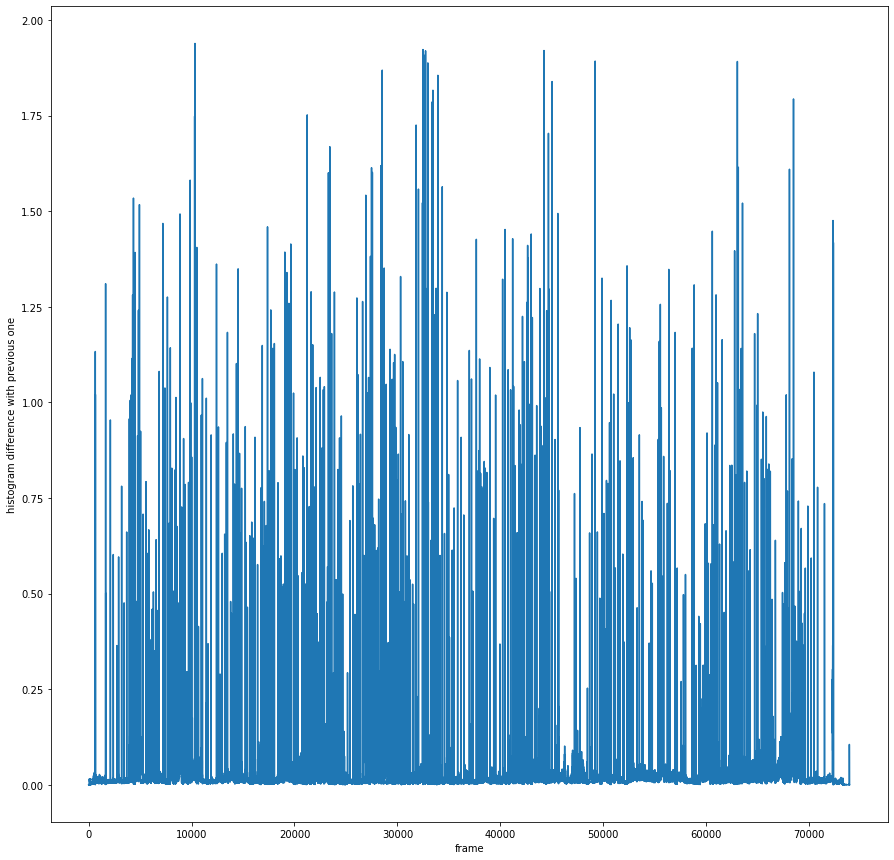

bbc_04
Numbers of frames:  73574
[0. 0. 0. ... 0. 0. 0.]
Numbers of shots 462


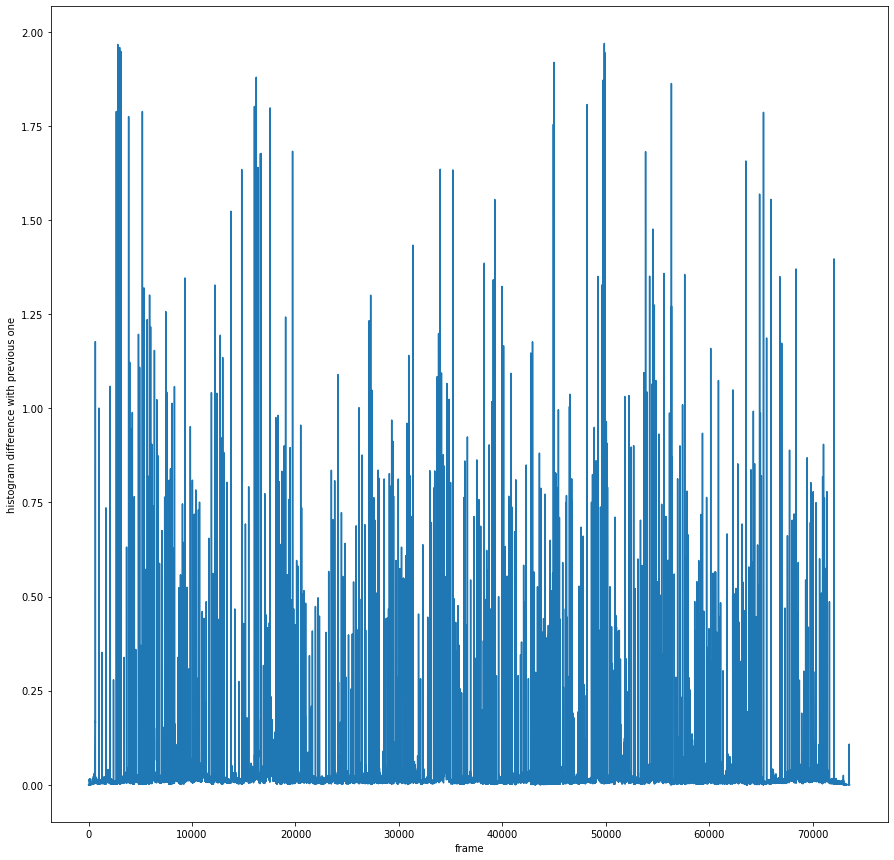

bbc_05
Numbers of frames:  73849
[0. 0. 0. ... 0. 0. 0.]
Numbers of shots 451


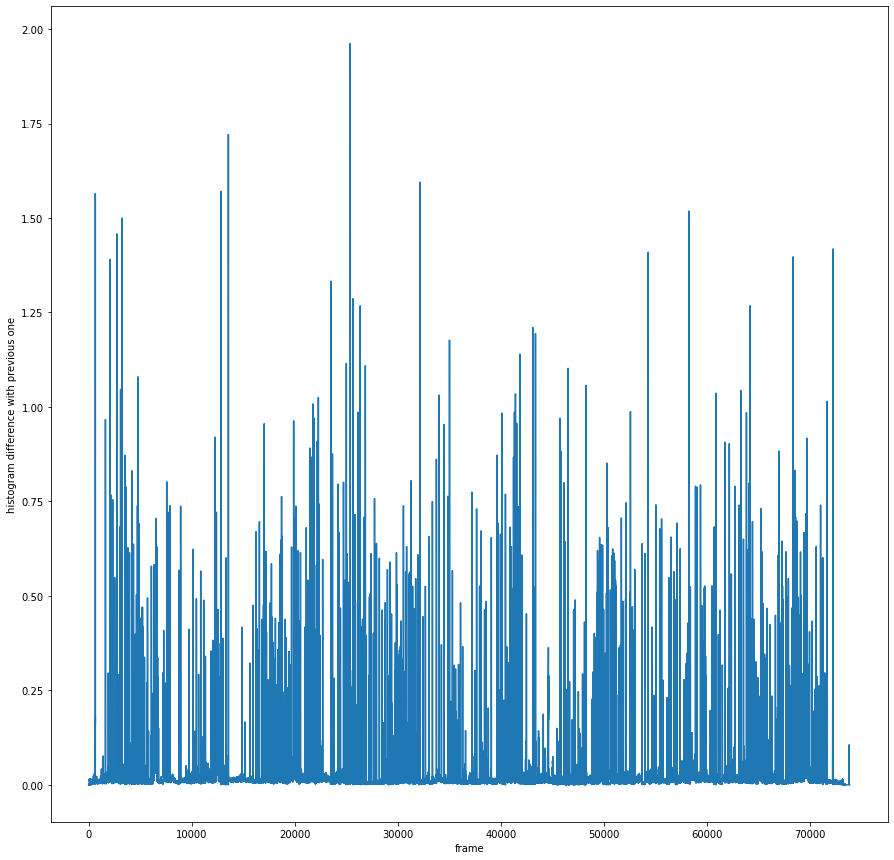

bbc_06
Numbers of frames:  73984
[0. 0. 0. ... 0. 0. 0.]
Numbers of shots 500


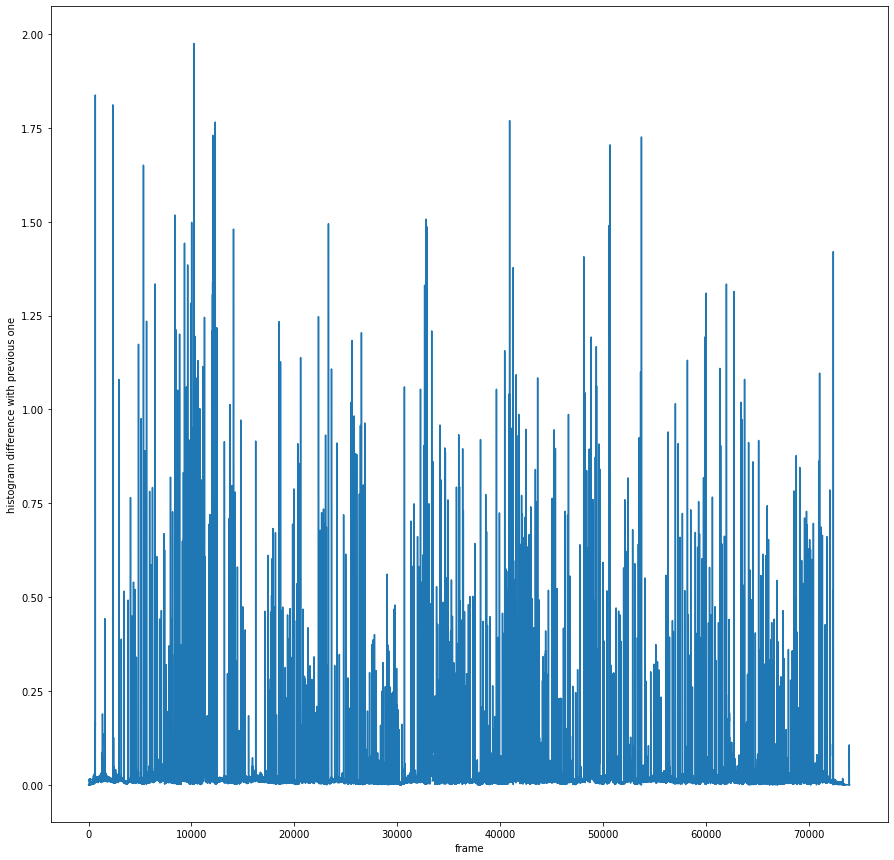

bbc_07
Numbers of frames:  73934
[0. 0. 0. ... 0. 0. 0.]
Numbers of shots 577


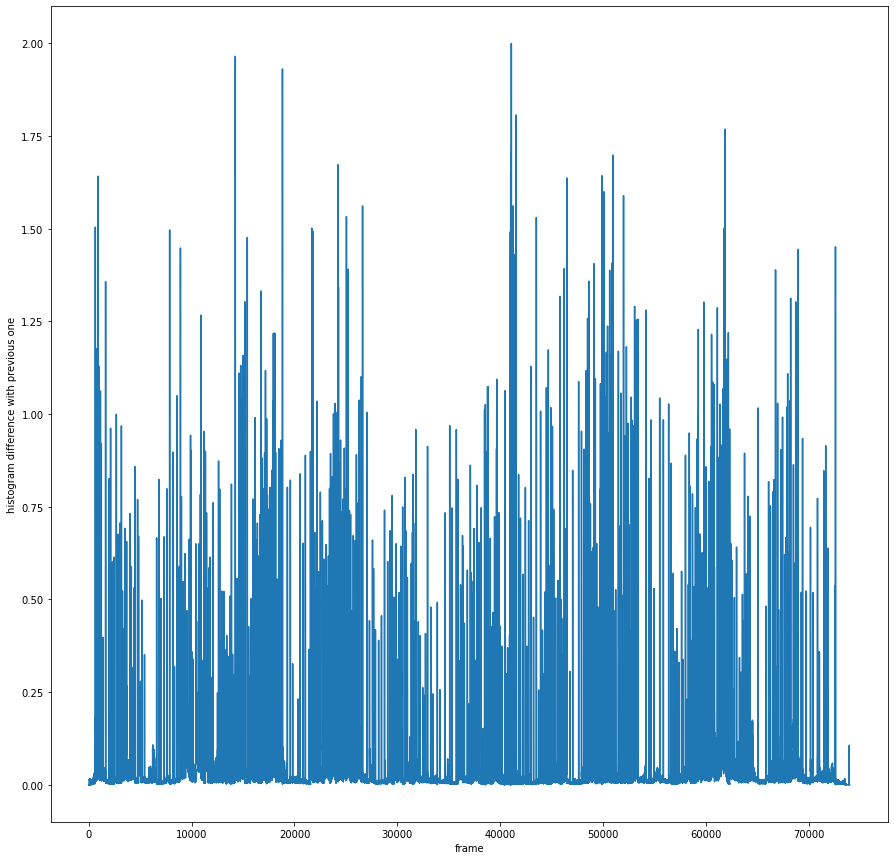

bbc_08
Numbers of frames:  73849
[0. 0. 0. ... 0. 0. 0.]
Numbers of shots 378


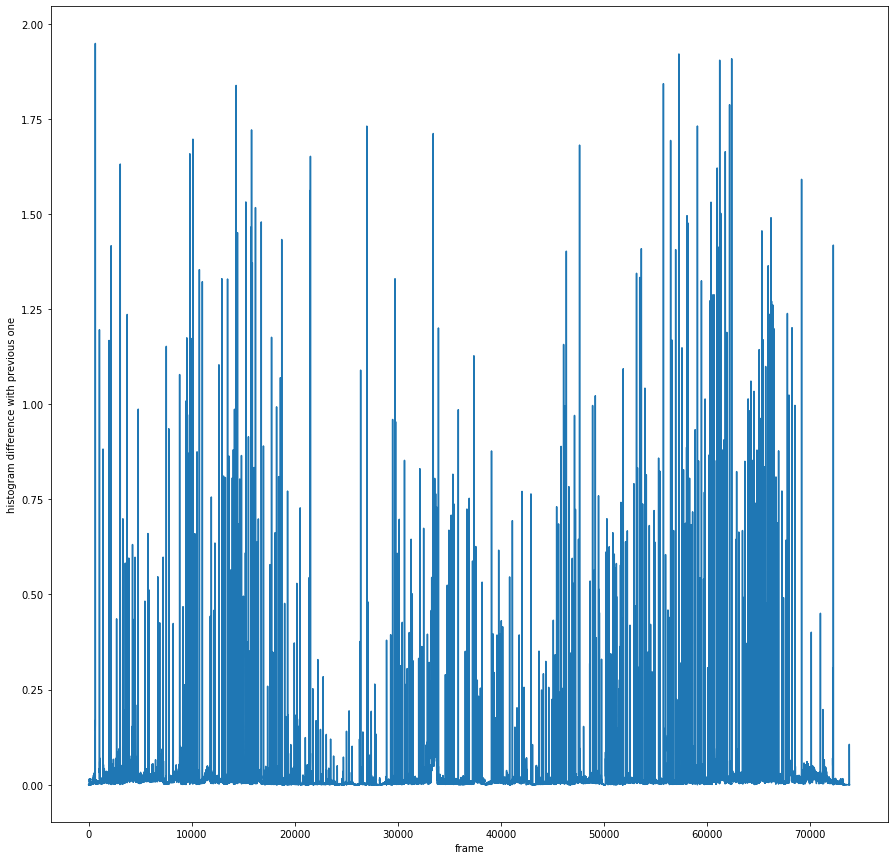

bbc_09
Numbers of frames:  73849
[0. 0. 0. ... 0. 0. 0.]
Numbers of shots 363


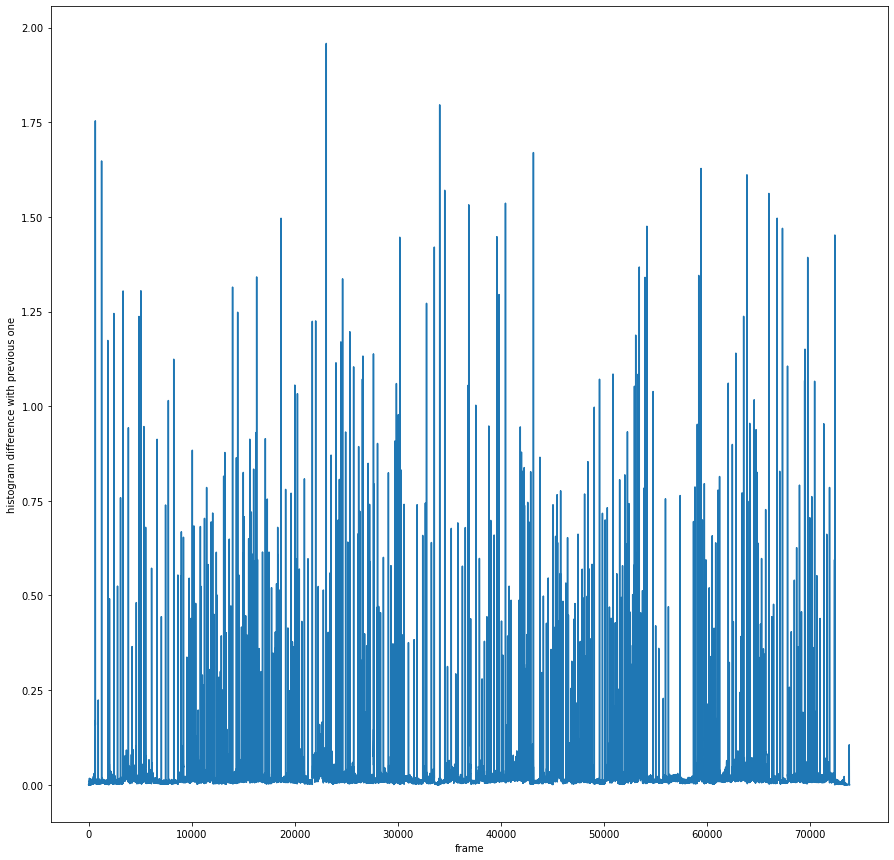

bbc_10
Numbers of frames:  73374
[0. 0. 0. ... 0. 0. 0.]
Numbers of shots 532


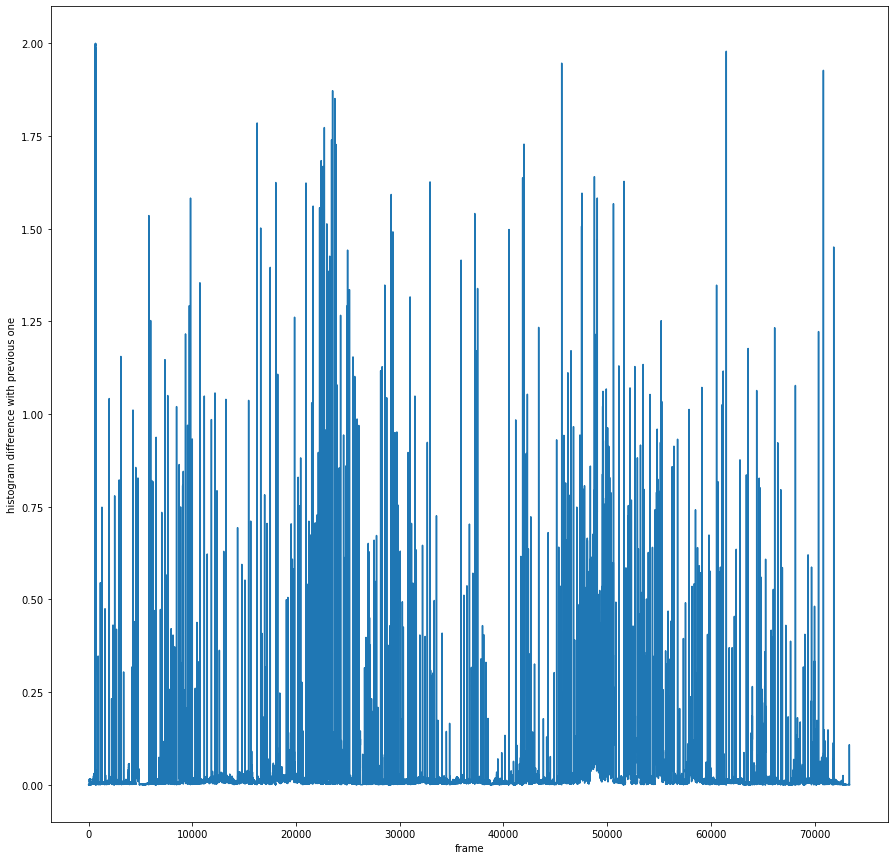

bbc_11
Numbers of frames:  73491
[0. 0. 0. ... 0. 0. 0.]
Numbers of shots 491


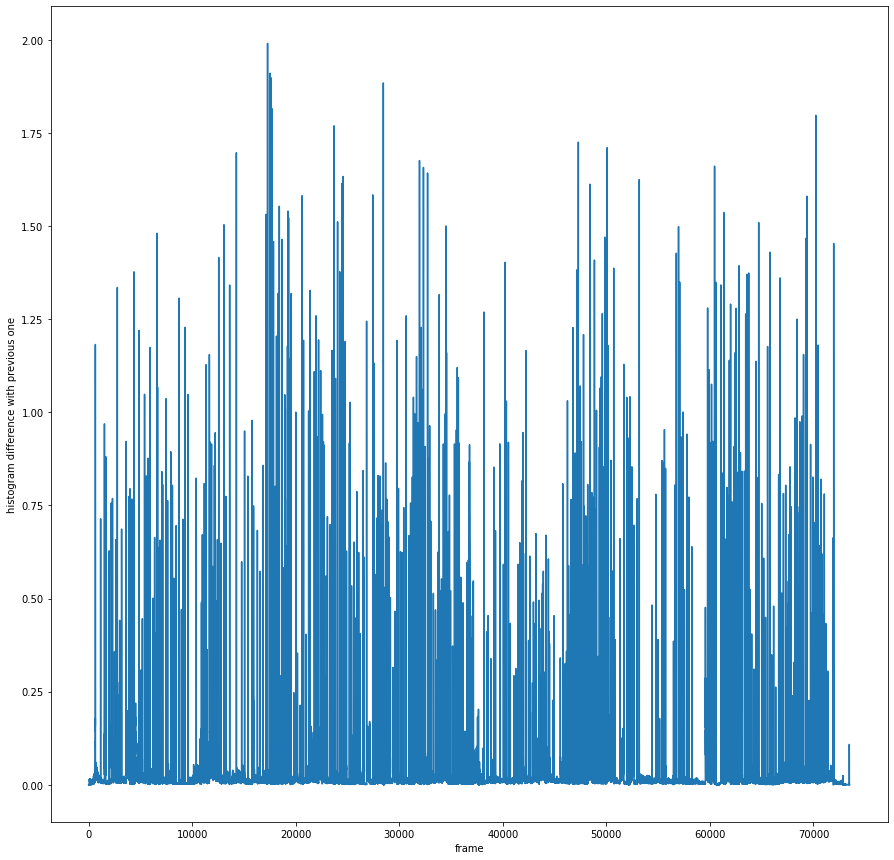

In [ ]:
from pathlib import Path

for file in os.listdir("./BBCPH"):
    if (file.endswith(".MP4")|file.endswith(".mp4")):
        videos_src_path = os.path.join("./BBCPH", file)
        file_name = Path(videos_src_path).stem
        print(file_name)
        save_file = "".join([file_name,"_result.txt"])
        files_save_path = os.path.join("Histogram", save_file)
        video2frame(videos_src_path, video_formats, files_save_path)